# ISYE 6740 FALL 2020
# HOMEWORK 4

##### By: Da Yang (dyang347@gatech.edu)




## 1. Basic Optimization (40 points)

Consider a simplified logistic regression problem. 
Given $m$ training samples $(x^i, y^i)$, $i = 1, \ldots, m$. The data $x^i \in \mathbb R$ (note that we only have one feature for each sample), and $y^i \in \{0, 1\}$.  To fit a logistic regression model for classification, we solve the following optimization problem, where $\theta \in \mathbb R$ is a parameter we aim to find: <br>

(1)

$$\max_\theta \ell (\theta), \label{eqn}$$
<br>
where the log-likelhood function 
$$\ell(\theta) = \sum_{i=1}^m \left\{-\log (1+\exp\{-\theta x^i\}) + (y^i-1) \theta x^i\right\}$$


#### (a) 
(10 points) Show step-by-step mathematical derivation for the gradient of the cost function $\ell(\theta)$ in (1). <br>



#### Answer:

logistics regression model as:

$$p(y=1|x, \theta) = \frac{1}{1+ exp(-\theta^{T}x)}$$

<br>

$$p(y=0|x, \theta) = 1- \frac{1}{1+ exp(-\theta^{T}x)} = \frac{exp(-\theta^{T}x)}{1+exp(-\theta^{T}x)}$$

for $i = 1, \ldots, m$, the probability of $y^i$ <br>

$$
P(y^i|x^i;\theta) = (\frac{1}{1+ exp(-\theta^{T}x^i)})^{y^i}(\frac{exp(-\theta^{T}x)}{1+exp(-\theta^{T}x)})^{1-y^i}
$$
<br>

The cost function $L(\theta)$:
$$L(\theta) = \Pi^{m}_{i=1}P(y^i| x^i, \theta)$$
<br>

##### The log-likelihood function 
$$\ell(\theta) = log\Pi^{m}_{i=1}P(y^i| x^i, \theta)$$

<br>

$$\ell(\theta) = \sum_{i=1}^{m}\left\{y^{i}log(\frac{1}{1+ exp(-\theta^{T}x^i)})+(1-y^{i})log(\frac{exp(-\theta^{T}x)}{1+exp(-\theta^{T}x)})\right\}$$
<br>


<br>
$$\ell(\theta) = \sum_{i=1}^{m}\left\{y^{i}log(\frac{1}{1+ exp(-\theta^{T}x^i)})-y^{i}log(\frac{exp(-\theta^{T}x)}{1+exp(-\theta^{T}x)})+log(\frac{exp(-\theta^{T}x)}{1+exp(-\theta^{T}x)})\right\}$$
<br>

<br>
$$\ell(\theta) = \sum_{i=1}^{m}\left\{-y^{i}log(1+ exp(-\theta^{T}x^i))-y^{i}log(exp(-\theta^{T}x)+y^{i}log(1+exp(-\theta^{T}x))+log(exp(-\theta^{T}x))-log(1+exp(-\theta^{T}x))\right\}$$
<br>

<br>
$$\ell(\theta) = \sum_{i=1}^{m}\left\{-y^{i}(-\theta^{T}x)+(-\theta^{T}x)-log(1+exp(-\theta^{T}x))\right\}$$
<br>

<br>
$$\ell(\theta) = \sum_{i=1}^{m}\left\{(y^{i}-1)(\theta^{T}x)-log(1+exp(-\theta^{T}x))\right\}$$
<br>

##### Gradient of the log-likelihood function

$$\frac{d\ell(\theta)}{d\theta} = \sum_{i=1}^{m}(y^i-1)x - \sum_{i=1}^{m}\frac{d(log(1+exp(-\theta^{T}x)))}{d\theta}$$

Make 
$$z = 1+exp^{-\theta^Tx}$$
$$t = \theta^T x$$

Based on the chain rule:
$$\frac{d\ell(\theta)}{d\theta} = \sum_{i=1}^{m}(y^i-1)x - \sum_{i=1}^{m}\frac{dlogz}{dz}\times\frac{dz}{dt}\times\frac{dt}{d\theta}$$

<br>
<br>

$$\frac{d\ell(\theta)}{d\theta} = \sum_{i=1}^{m}(y^i-1)x - \sum_{i=1}^{m}x(\frac{1}{1+exp(-\theta^Tx)})(-exp(-\theta^Tx))$$

$$\frac{d\ell(\theta)}{d\theta} = \sum_{i=1}^{m}(y^i-(1-\frac{exp(-\theta^Tx)}{1+exp(-\theta^Tx)})x$$

<br>
<br>

$$\frac{d\ell(\theta)}{d\theta} = \sum_{i=1}^{m}(y^i-\frac{1}{1+exp(-\theta^Tx)})x$$



#### (b) 
(10 points) Write a pseudo-code  for performing **gradient descent** to find the optimizer $\theta^*$. This is essentially what the training procedure does. (pseudo-code  means you will write down the steps of the algorithm, not necessarily any specific programming language.) <br>

#### Answer:

In order to find the max of $\ell(\theta)$, we will need to calculate to make the derivation of gradient descent to zero. 
To find the optimal solution, we will do the iteration along with the steepest direction at each step.

We first initialize parameter $\theta$, and the step size as $\alpha$

$$\theta^{t+1} = \theta^{t} + \alpha \times \frac{d\ell(\theta)}{d\theta}$$

<br>
While $||\theta^{t+1}-\theta^{t}|| > \epsilon$ 

#### (c) 
(10 points) Write the pseudo-code for performing the **stochastic gradient descent** algorithm to solve the training of logistic regression problem (1). Please explain the difference between gradient descent and stochastic gradient descent for training logistic regression. <br>



#### Answer:

#### SGD:
* For SGD, at each iteration step, we randomly sample a samll subset $S_t$ data point
* Use gradient estimated using the samll subset in $S_t$
* Each iteration use a different subset of data and calcualte the gradient descent again
* And keep loop through the entire traing dataset. 

#### Comparison:
The primary difference is that stochastic gradient descent only use subset of data in each iteration instead of going through the entire training dataset at each iteration.
This will also provide good estimation while reduce the computation cost of going through the entire data set again and again at each step.
The SGD will also speed up the solution when dealing with large training data set.
On the other hand, it will have more noise as well as risk of not going through the optimal direction since the gradient descent is only calculated from sample data

#### (d) 
(10 points) We will **show that the training problem in basic logistic regression problem is concave.** Derive the Hessian matrix of $\ell(\theta)$ and based on this, show the training problem (1) is concave (note that in this case, since we only have one feature, the Hessian matrix is just a scalar). Explain why the problem can be solved efficiently and gradient descent will achieve a unique global optimizer, as we discussed in class. 

#### Answer:

The hessian in the problem is the second partial derivative of $\ell(\theta)$ with respect to $\theta$.

$$\frac{d\ell(\theta)}{d\theta} = \sum_{i=1}^{m}(y^i-\frac{1}{1+exp(-\theta^Tx)})x$$


Based on Chain Rule: <br>

Let $u = 1+exp(-\theta^Tx)$

$$\frac{d^2\ell(\theta)}{d\theta} = \sum_{i=1}^{m}(y^i-\frac{1}{u})x\times \frac{du}{d\theta}$$

$$=\sum_{i=1}^{m}(-x(-\frac{1}{u^2})(-x \times exp(-\theta^Tx))$$
<br>
$$=\sum_{i=1}^{m}(-x(-\frac{1}{(1+exp(-\theta^Tx))^2})(-x \times exp(-\theta^Tx))$$
<br>
$$=\sum_{i=1}^{m}(-x^{2}(\frac{exp(-\theta^Tx)}{(1+exp(-\theta^Tx))^2})$$
<br>
$$=-x^{2}\sum_{i=1}^{m}((\frac{1}{1+exp(-\theta^Tx)}-\frac{1}{(1+exp(-\theta^Tx))^2})$$

Because $exp(-\theta^{T}x)>0$, so $1+exp(-\theta^{T}x) > 1$
From above, we know 
$$\frac{1}{1+exp(-\theta^Tx)}-\frac{1}{(1+exp(-\theta^Tx))^2} > 0$$

From above, 
$$\frac{d^2\ell(\theta)}{d\theta}=-x^{2}\sum_{i=1}^{m}((\frac{1}{1+exp(-\theta^Tx)}-\frac{1}{(1+exp(-\theta^Tx))^2}) < 0$$

Because the second derivateive is negative, therefore the objective function $\ell(\theta)$ is a concave optimization problem, the optimal solution will be the max value

## 2. Comparing Bayes, logistic, and KNN classifiers. (60 points)

In lectures, we learn three different classifiers. This question is to implement and compare them. Python users, please feel free to use $\textsf{Scikit-learn}$, which is a commonly-used and powerful $\textsf{Python}$ library with various machine learning tools. But you can also use other similar libraries in other languages of your choice to perform the tasks. 


#### Part One (Divorce classification/prediction) (30 points) 

This dataset is about participants who completed the personal information form and a divorce predictors scale. 

The data is a modified version of the publicly available at  https://archive.ics.uci.edu/ml/datasets/Divorce+Predictors+data+set (by injecting noise so you will not get the exactly same results as on UCI website).  The dataset $\textsf{marriage.csv}$ is contained in the homework folder. There are 170 participants and 54 attributes (or predictor variables) that are all real-valued. The last column of the CSV file is label $y$ (1 means "divorce", 0 means "no divorce"). Each column is for one feature (predictor variable), and each row is a sample (participant). A detailed explanation for each feature (predictor variable) can be found at the website link above. Our goal is to build a classifier using training data, such that given a test sample, we can classify (or essentially predict) whether its label is 0 ("no divorce") or 1 ("divorce"). 



Build three classifiers using (**Naive Bayes, Logistic Regression, KNN**). Use the first $80\%$ data for training and the remaining $20\%$ for testing. If you use $\textsf{scikit-learn}$ you can use $\textsf{train_test_split}$ to split the dataset. 

Remark: Please note that, here, for Naive Bayes, this means that we have to estimate the variance for each individual feature from training data. When estimating the variance, if the variance is zero to close to zero (meaning that there is very little variability in the feature), you can set the variance to be a small number, e.g., $\epsilon = 10^{-3}$. We do not want to have include zero or nearly variance in Naive Bayes. This tip holds for both Part One and Part Two of this question.



In [20]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

#### Data Preparation
* Read data into csv
* Train and split data randomly 80%/20%

In [6]:
# read the data set and display top 5 rows
df_mar = pd.read_csv('marriage.csv', header=None)
df_mar.head()

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,1.560903,3.681587,3.450467,3.211998,-1.203045,0.597706,-0.970093,-0.750970,-0.511495,-0.133660,...,2.077401,1.184182,3.955069,2.608046,2.303629,1.721660,3.275018,1.761019,1.215237,1.0
1,4.153272,5.173858,4.100690,2.580173,3.305788,-1.505512,-0.029398,5.702657,2.230281,4.975496,...,3.467076,2.451984,3.504294,5.324240,4.480607,5.375248,2.270379,2.167944,2.191214,1.0
2,2.226241,1.575322,2.389117,2.725405,-0.304562,2.832803,1.787779,0.565755,1.328212,2.335353,...,1.200917,1.241794,2.207492,1.228034,0.870052,1.685040,2.341985,-0.444320,2.527452,1.0
3,3.553458,2.859042,2.928414,1.833241,1.271119,4.165213,2.078597,4.506175,2.521628,2.747315,...,3.196291,2.204824,3.664982,3.689508,2.577677,3.171884,2.164660,1.813024,1.376033,1.0
4,0.506547,1.419223,1.716153,1.319274,2.853840,0.047412,-0.016515,0.620795,1.202992,0.078347,...,1.806657,2.085539,2.012551,1.899477,1.510134,1.373350,2.551119,0.846321,-0.066858,1.0


In [11]:
df_mar.shape

(170, 55)

In [16]:
# the data set contains both x - features and y - label, split for future calculation
# Per discussion from Piazza, no need for scale data
df_x = df_mar.iloc[:,:-1]
df_y = df_mar.iloc[:,-1]

In [17]:
df_x.shape

(170, 54)

In [18]:
df_y.shape

(170,)

In [367]:
# Split data: 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=123, stratify = df_y, shuffle=True)

#### (a)
(15 points) Report testing accuracy for each of the three classifiers.  Comment on their performance: which performs the best and make a guess why they perform the best in this setting. 

#### Naive Bayes

In [294]:
from sklearn.naive_bayes import GaussianNB

In [295]:
# Define function for Naive Bayes Classifier
def NBClassify(features_train, labels_train, err):

    clf = GaussianNB(var_smoothing=err)
    clf.fit(features_train, labels_train)
    return clf

In [296]:
nbclf = NBClassify(X_train, y_train, 1e-03)

In [297]:
y_nb = nbclf.predict(X_test)

In [298]:
from sklearn.metrics import accuracy_score
nb_acc = accuracy_score(y_nb, y_test)
nb_acc

0.9411764705882353

#### Logistics Regression

In [299]:
from sklearn.linear_model import LogisticRegression

In [300]:
lgclf = LogisticRegression(penalty='none')
lgclf.fit(X_train, y_train)
y_log = lgclf.predict(X_test)

In [301]:
from sklearn.metrics import accuracy_score
nb_acc = accuracy_score(y_log, y_test)
nb_acc

0.9411764705882353

#### KNN

In [368]:
# apply KNN with different k to find the best k for the model
# use the training data to train the data and test data to calculate the accuracy score
# at the end output the accuracy score associated with k

def KNNClassify(features_train, labels_train, features_test, labels_test, kmax=10):
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.metrics import accuracy_score
    
    ml_acc = 0
    ml_k = 0
    for i in range(1,kmax):
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(features_train, labels_train)
        labels_pred = knn.predict(features_test)
        knn_acc = accuracy_score(labels_pred, labels_test)
        print('{} neighbors accuracy = {}'.format(i, knn_acc))
        if knn_acc >= ml_acc:
            ml_acc = knn_acc
            ml_k = i
    print('best k = {}; accuracy = {}'.format(ml_k, ml_acc))        
    return ml_k, ml_acc

In [369]:
k, acc = KNNClassify(X_train, y_train, X_test, y_test,10)

1 neighbors accuracy = 0.9411764705882353
2 neighbors accuracy = 0.9411764705882353
3 neighbors accuracy = 0.9411764705882353
4 neighbors accuracy = 0.9411764705882353
5 neighbors accuracy = 0.9411764705882353
6 neighbors accuracy = 0.9411764705882353
7 neighbors accuracy = 0.9411764705882353
8 neighbors accuracy = 0.9411764705882353
9 neighbors accuracy = 0.9411764705882353
best k = 9; accuracy = 0.9411764705882353


##### From above result, KNN always have the same result for this training/test data set
* potential reason could be the random split of train and test data
* Since this is 0,1 binary classification, KNN is not a good fit for this because it only has two clusters
<br>
<br>
In this case, use k = 5 as a general number

In [304]:
# run the KNN classification with selected k
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
labels_pred = knn.predict(X_test)
knn_acc = accuracy_score(labels_pred, y_test)
knn_acc

0.9411764705882353

#### Comment:

At the end, the 3 classification models generates exactly the same accuracy result.
Other test scanerios were performed on the random state of train/split and train/split percentage. 

Overall, the three models finds the same accuracy result at the end. 

1. It could be the reason of the data quality. The data set quality can be in good quality with less noisy so the classification models land the same at the end. 
2. The data set is small, and the test set is even smaller, plus it is a binary classification so it is too easy for the models to perform the classification and the results happen to be the same
3. We are only using the accuracy store to compare besides the above point that the classification is binary. So the percentage could be the same but there might be slightly different labels at point level

#### (b)
(15 points) Now perform PCA to project the data into two-dimensional space. Plot the data points and decision boundary of each classifier. Comment on the difference between the decision boundary for the three classifiers. Please clearly represent the data points with different labels using different colors.

#### PCA Application

In [307]:
# Perform PCA from sklearn over all X
from sklearn.decomposition import PCA
pca = PCA(n_components=2, svd_solver='full')
pca.fit(df_x)

print(pca.explained_variance_ratio_)
print(pca.singular_values_)


[0.55095986 0.03378742]
[129.51817306  32.07364052]


In [311]:
# apply dimensional reduction to dataset
df_pca = pca.transform(df_x)

In [312]:
# Split data: 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(df_pca, df_y, test_size=0.2, random_state=123, stratify = df_y, shuffle=True)

#### Plot Decision Boundary

In [317]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

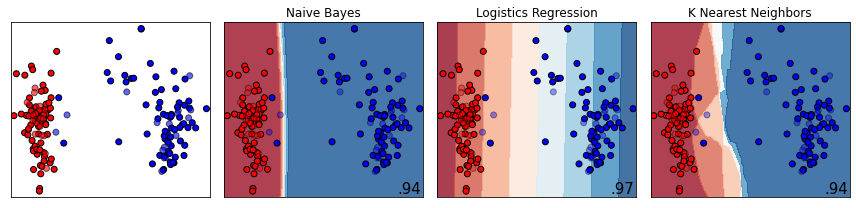

In [333]:
# Method from SKlearn example
# reference page: https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

figure = plt.figure(figsize=(12, 3))


h = .02  # step size in the mesh

names = ["Naive Bayes", "Logistics Regression", "K Nearest Neighbors"]

classifiers = [
    GaussianNB(var_smoothing=1e-3),
    LogisticRegression(penalty='none'),
    KNeighborsClassifier(n_neighbors=5)]



x_min, x_max = df_pca[:, 0].min() - .5, df_pca[:, 0].max() + .5
y_min, y_max = df_pca[:, 1].min() - .5, df_pca[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# just plot the dataset first
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

ax = plt.subplot(1, len(classifiers) + 1, 1)

# Plot the training points
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')
# Plot the testing points
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())

i = 2
for name, clf in zip(names, classifiers):
        ax = plt.subplot(1, len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
        
        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.4)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
    
        ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1


        
plt.tight_layout()
plt.show()

#### Comments:

First the data set is clearly clustered into two groups with very few noisy points.
So the model will also highly depend on the train/split because the selection of those outliers will have a bigger impact of the model accuracy. 

Among three models,<br>
Navie Bayes and Logsitics Regression are parameter based so the boundary is more clear while KNN is non-parametic with a more customized boundary. <br>
In this case, the KNN seems better when predicting outliers or noisy points. 
Overall logistics has a slightly better performance over the rest of two but it might be due to the data selection and data size. I would suggest all three models have equally strong performance in general.

#### Part Two (Handwritten digits classification) (30 points)
Repeat the above using the $\textbf{MNIST Data}$ in our previous homework. Here, give "digit" 6 label $y = 1$, and give "digit" 2 label $y = 0$. All the pixels in each image will be the feature (predictor variables) for that sample (i.e., image). Our goal is to build classifier to such that given a new test sample, we can tell is it a 2 or a 6. Using the first $80\%$ of the samples for training and remaining $20\%$ for testing. 

#### Answer:

In [334]:
import scipy.io as spio

In [336]:
# Read MNIST data

# read from image
img_raw = spio.loadmat('data.mat')
# read data from true label
label_raw = spio.loadmat('label.mat')

In [341]:
# read the data into numpy array
df_img = img_raw['data']
df_img.shape

(784, 1990)

In [339]:
df_label = label_raw['trueLabel']
df_label.shape

(1, 1990)

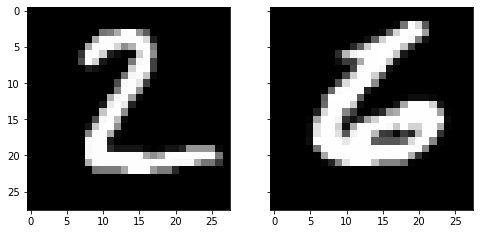

In [344]:
fig, ax = plt.subplots(1,2,figsize=(8,4), sharey=True, sharex=True)
ax[0].imshow(df_img[:,0].reshape(28,28).T, cmap='gray')
ax[1].imshow(df_img[:,-1].reshape(28,28).T, cmap='gray')

In [383]:
set(df_label.ravel())

{2, 6}

In [384]:
# Change the label in y: digit 6: 1; digit 2: 0
label_map = {2:0, 6:1}

In [388]:
df_y = np.vectorize(label_map.get)(df_label)

In [389]:
set(df_y.ravel())

{0, 1}

In [390]:
# Need to transpose the array to make each row as one image and each pixel as one col
X = df_img.T

# y in sklearn would be only 1-D array
y = df_y.ravel()

In [391]:
# Split train/test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify = y, shuffle=True)

#### (a)
(15 points) Report testing accuracy for each of the three classifiers.  Comment on their performance: which performs the best and make a guess why they perform the best in this setting. 

#### Naive Bayes 


In [392]:
nb = GaussianNB(var_smoothing=1e-3)
nb.fit(X_train, y_train)
y_nb = nb.predict(X_test)

nb_acc = accuracy_score(y_nb, y_test)
nb_acc

0.9271356783919598

#### Logistics Regression

In [393]:
lgclf = LogisticRegression(penalty='none')
lgclf.fit(X_train, y_train)
y_log = lgclf.predict(X_test)
nb_acc = accuracy_score(y_log, y_test)
nb_acc

0.9673366834170855

#### KNN

In [394]:
k, acc = KNNClassify(X_train, y_train, X_test, y_test,10)

1 neighbors accuracy = 0.9949748743718593
2 neighbors accuracy = 0.9949748743718593
3 neighbors accuracy = 0.9949748743718593
4 neighbors accuracy = 0.9949748743718593
5 neighbors accuracy = 0.9949748743718593
6 neighbors accuracy = 0.992462311557789
7 neighbors accuracy = 0.9899497487437185
8 neighbors accuracy = 0.9899497487437185
9 neighbors accuracy = 0.9899497487437185
best k = 5; accuracy = 0.9949748743718593


In [395]:
# run the KNN classification with selected k
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
labels_pred = knn.predict(X_test)
knn_acc = accuracy_score(labels_pred, y_test)
knn_acc

0.9949748743718593

#### Comments:

Among the 3 classification models, KNN has the best performance over Naive Bayes and Logistics Regression.
From my point of view, it is because KNN is non-parametric model so it deals better with noise data prediction with a more flexible and dynamic decision boundary. This might fit better in image matrix classification because the pixel could have more noise. 

#### (b)
(15 points) Now perform PCA to project the data into two-dimensional space. Plot the data points and decision boundary of each classifier. Comment on the difference between the decision boundary for the three classifiers. Please clearly represent the data points with different labels using different colors.

In [397]:
# PCA Application

# Perform PCA from sklearn over all X
from sklearn.decomposition import PCA
pca = PCA(n_components=2, svd_solver='full')
pca.fit(X)

print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.11723304 0.0799279 ]
[109.67772186  90.56129323]


In [398]:
# apply dimensional reduction to X
df_pca = pca.transform(X)

In [401]:
# Split data: 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(df_pca, y, test_size=0.2, random_state=123, stratify = y, shuffle=True)

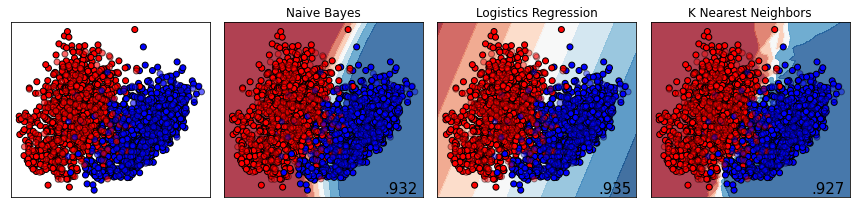

In [403]:
# Method from SKlearn example
# reference page: https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

figure = plt.figure(figsize=(12, 3))


h = .02  # step size in the mesh

names = ["Naive Bayes", "Logistics Regression", "K Nearest Neighbors"]

classifiers = [
    GaussianNB(var_smoothing=1e-3),
    LogisticRegression(penalty='none'),
    KNeighborsClassifier(n_neighbors=5)]



x_min, x_max = df_pca[:, 0].min() - .5, df_pca[:, 0].max() + .5
y_min, y_max = df_pca[:, 1].min() - .5, df_pca[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# just plot the dataset first
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

ax = plt.subplot(1, len(classifiers) + 1, 1)

# Plot the training points
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')
# Plot the testing points
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())

i = 2
for name, clf in zip(names, classifiers):
        ax = plt.subplot(1, len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
        
        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.4)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
    
        ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.3f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1


        
plt.tight_layout()
plt.show()

#### Comments:
There is a clear decision boundary from the PCA on the 2-D graph so all three models have good performance. 
They are all strong enough to give over 90% accuracy store so all are powerful. 

KNN can be too sensitive to the noise so the performance could be depend on the train and test data. So after the application of PCA, the data is more structured with less noise so Logistics and Navie looks better then KNN.

If possible, we probably could more focus on the data preprocessing. Maybe we can find a better way to seperate the two label group from the data.

## Naive Bayes for spam filtering. (15 points) 

In this problem, we will use the Naive Bayes algorithm to fit a spam filter by hand. This will enhance your understanding to Bayes classifier and build intuition. This question does not involve any programming but only derivation and hand calculation. 

Spam filters are used in all email services to classify received emails as "Spam" or "Not Spam". A simple approach involves maintaining a vocabulary of words that commonly occur in "Spam" emails and classifying an email as "Spam" if the number of words from the dictionary that are present in the email is over a certain threshold.

We are given the vocabulary consists of 15 words $$V=\{\textsf{secret, offer, low, price, valued, customer, today, dollar, million, sports, is, for, play, healthy, pizza}\}$$ We will use $V_i$ to represent the $i$th word in $V$. As our training dataset, we are also given 3 example spam messages,

* $\textsf{million dollar offer}$
* $\textsf{secret offer today}$
* $\textsf{secret is secret}$

and 4 example non-spam messages
* $\textsf{low price for valued customer}$
* $\textsf{play secret sports today}$
* $\textsf{sports is healthy}$
* $\textsf{low price pizza}$

Recall that the Naive Bayes classifier assumes the probability of an input depends on its input feature. The feature for each sample is defined as
$x^{(i)} = [x_1^{(i)}, x_2^{(i)}, \ldots, x_d^{(i)}]^T$, $i = 1, \ldots, m$ and the class of the $i$th sample is $y^{(i)}$. In our case the length of the input vector is $d = 15$, which is equal to the number of words in the vocabulary $V$. Each entry $x_j^{(i)}$ is equal to the number of times word $V_j$ occurs in the $i$-th message. 

#### Answer:

In [405]:
# List of spam keyword
V = ['secret', 'offer', 'low', 'price', 'valued', 'customer', 'today', 'dollar', 'million', 'sports', 'is', 'for', 'play', 'healthy', 'pizza']

#### (a)
(5 points) Calculate class prior $\mathbb P(y = 0)$ and $\mathbb P(y = 1)$ from the training data, where $y = 0$ corresponds to spam messages, and $y = 1$ corresponds to non-spam messages. Note that these class prior essentially corresponds to the frequency of each class in the training sample. Write down the feature vectors for each spam and non-spam messages.

#### Answer:

There are total of 7 examples given, 3 are spam and 4 are non-spam.
<br>
$$\mathbb P(y = 0) = 3/7$$
$$\mathbb P(y = 1) = 4/7$$

In [406]:
# list of exmple emails

X_spam = ['million dollar offer','secret offer today','secret is secret']
X_non_spam = ['low price for valued customer','play secret sports today','sports is healthy','low price pizza']

In [410]:
X = X_spam + X_non_spam
X

['million dollar offer',
 'secret offer today',
 'secret is secret',
 'low price for valued customer',
 'play secret sports today',
 'sports is healthy',
 'low price pizza']

In [457]:
# Put all the words into one list as key word list
kw_ls = []
em_ls = []
for i in range(len(X)):
    kw = X[i].split(' ')
    kw_ls += kw
    em_ls.append(kw)

kw_set = list(set(kw_ls))
print(len(kw_set))
print(len(em_ls))

15
7


#### Feature & Labels

In [458]:
kw_set

['play',
 'pizza',
 'today',
 'offer',
 'low',
 'customer',
 'sports',
 'secret',
 'is',
 'for',
 'healthy',
 'million',
 'price',
 'dollar',
 'valued']

In [459]:
em_ls

[['million', 'dollar', 'offer'],
 ['secret', 'offer', 'today'],
 ['secret', 'is', 'secret'],
 ['low', 'price', 'for', 'valued', 'customer'],
 ['play', 'secret', 'sports', 'today'],
 ['sports', 'is', 'healthy'],
 ['low', 'price', 'pizza']]

In [460]:
feature_ls = []
for em in em_ls:
    feature = []
    for kw in kw_set:
        if kw in em:
            feature.append(1)
        else:
            feature.append(0)
    
    feature_ls.append(feature)

In [461]:
feature_array = np.vstack(feature_ls)
feature_array

array([[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0],
       [0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1],
       [1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]])

In [462]:
y = np.array([0,0,0,1,1,1,1])
y

array([0, 0, 0, 1, 1, 1, 1])

#### (b)
(5 points) In the Naive Bayes model, assuming the keywords are independent of each other (this is a simplification), the likelihood of a sentence with its feature vector $x$ given a class $c$ is given by 
$$
\mathbb P (x|y = c) = \prod_{k=1}^d \theta_{c, k}^{x_k}, \quad c = \{0, 1\}
$$
<br>
where $0 \leq \theta_{c,k} \leq 1$ is the probability of word $k$ appearing in class $c$, which satisfies <br>
$$\theta_{0,k} = 1- \theta_{1, k} , \quad \forall k.$$ 
<br>
Given this, the complete log-likelihood function for our training data is given by
<br>
$$
\ell(\theta_{0,1}, \ldots, \theta_{0, d}, \theta_{1,1}, \ldots, \theta_{1, d}) = 
\sum_{i=1}^m \sum_{k=1}^d x_k^{(i)} \log \theta_{y^{(i)}, k}
$$
<br>
(In this example, $m = 7$.)
 Calculate the maximum likelihood estimates of $\theta_{0,1}$, $\theta_{0,7}$, $\theta_{1,1}$, $\theta_{1,15}$ by maximizing the log-likelihood function above.
 %$\mathbb P (x|y = c)$ with respect to $\theta_{c, k}$ and given data. 
 (Hint: We are solving a constrained maximization problem: you can introduce Lagrangian multipliers, or directly substitute the $\theta_{0,k} = 1- \theta_{1, k}$ into the objective function so you do not need to worry about the constraint.)



#### Answer:

Posterior probability: 
<br>
$$P(y = c|x) = \frac{P(x|y = c)P(y)}{P(x)}=\frac{P(x|y = c)P(y)}{\sum P(x|y)P(y)}$$

$$P(y|x) = P(X, y) = P(X_1, y_1) \times P(X_2, y_2) \times \ ...\times P(X_m, y_m)$$

$$P(X, y) = \prod^m_i P(X_i, y_i)$$
$$P(X, y) = \prod^m_i P(X_i|y_i)P(y_i)$$
$$P(X, y) = \prod^m_i (P(y_i) \prod^d_k \theta^{x_k}_{c,k})$$

Log of probability:

$$logP(X, y) = \sum^m_i log\left(P(y_i) \prod \theta^{x_k}_{c,k}\right)$$

With Constraint:
$$\sum \theta_{c,k} = 1 $$

With Lagrangian multiplier, the objective function is


$$\ell(\theta) = \sum^m_i \left(log P(y_i) + \sum^d_k log\theta^{x_k}_{c,k}\right) + \lambda (\sum \theta_{c,k}-1)$$

To Calculate the derivative of $\theta$ for optimal point:

$$ \frac{d\ell(\theta)}{d\theta} = 0$$

$$ = \frac{1}{\theta_{c,k}}\sum^m_i \left( x^i_{c,k}\right) + \lambda$$

So we have

$$\theta_{c,k}=-\frac{\sum^m_{i} x^i_{c,k} }{\lambda}$$

$$\sum \theta_{c,k} = 1$$
<br>
<br>
$$\frac{\sum _{k=1}^{n} \sum _{i=1}^{m} x^i_{c,k}}{\lambda}=1$$

In this way, we have:

$$\theta_{c,k} = \frac{ \sum _{i=1}^{m} x^i_{c,k}}{\sum _{k=1}^{n} \sum _{i=1}^{m} x^i_{c,k}}$$

Calculate Probability:

'secret' count (3) in all spam emails (9 words)
$$\theta_{0,1} = \frac{1}{3}$$

'today' count (1) in all spam emails (9 words)
$$\theta_{0,7} = \frac{1}{9}$$

'secret' count (1) in all non spam emails (15 words)
$$\theta_{1,1} = \frac{1}{15}$$

'pizza' count (1) in all non spam emails (15 words)
$$\theta_{1,15} = \frac{1}{15}$$

#### (c)
Given a test message $"\textsf{today is secret}"$, using the Naive Bayes classier that you have trained in Part (a)-(b), to calculate the posterior and decide whether it is spam or not spam.

In [463]:
# build feature vector of 'today is secret'
test = ['today is secret']
test_ls = []
for em in test:
    feature = []
    for kw in kw_set:
        if kw in em:
            feature.append(1)
        else:
            feature.append(0)
    
    test_ls.append(feature)

In [487]:
np.array(kw_set)

array(['play', 'pizza', 'today', 'offer', 'low', 'customer', 'sports',
       'secret', 'is', 'for', 'healthy', 'million', 'price', 'dollar',
       'valued'], dtype='<U8')

In [472]:
x_test = np.array(test_ls[0]).reshape(1,-1)
x_test

array([[0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0]])

In [503]:
# use Naive Bayes Model with larger var_smoothing to smooth
nb = GaussianNB(var_smoothing=1)

In [504]:
# fit model with the feature array and y
nb.fit(feature_array, y)

GaussianNB(var_smoothing=1)

In [505]:
# make prediction, the 0 means the test email is classified as spam
nb.predict(x_test)

array([0])

In [506]:
# posterior probabilty of test x in two classes, the probabliy in spam class is high
nb.predict_proba(x_test)[0]

array([0.93976218, 0.06023782])